**PCA:** <br>
**Algorithm :** <br>

Listed below are the 6 general steps for performing a principal component analysis, which we will investigate in the following sections.

- Take the whole dataset consisting of d-dimensional samples ignoring the class labels
- Compute the d-dimensional mean vector (i.e., the means for every dimension of the whole dataset)
- Compute the scatter matrix (alternatively, the covariance matrix) of the whole data set
- Compute eigenvectors (ee1,ee2,...,eed) and corresponding eigenvalues (λλ1,λλ2,...,λλd)
- Sort the eigenvectors by decreasing eigenvalues and choose k eigenvectors with the largest eigenvalues to form a d×k dimensional matrix W(where every column represents an eigenvector)
- Use this d×k eigenvector matrix to transform the samples onto the new subspace. This can be summarized by the mathematical equation: <br>   y = $W^T$× $x$(where x is a d×1-dimensional vector representing one sample, and y is the transformed k×1-dimensional sample in the new subspace.)

**Application:** <br>
- Compression
- Reduce disk/memory needed to store data
- Speed up learning algorithm. Warning: mapping should be defined only on training set and then applied to test set

**Limitations:** <br>
- PCA is not scale invariant
- The directions with largest variance are assumed to be of most interest
- Only considers orthogonal transformations (rotations) of the original variables
- PCA is only based on the mean vector and covariance matrix. Some distributions (multivariate normal) are characterized by this but some are not
- If the variables are correlated, PCA can achieve dimension reduction. If not, PCA just orders them according to their variances

**Performing PCA on un-normalized variables will lead to insanely large loadings for variables with high variance. In turn, this will lead to dependence of a principal component on the variable with high variance. This is undesirable.**

- % variance explained by PCA is the % variance of each column / sum(variance of all PCA columns)
- To interpret each component, we must compute the correlations between the original data and each principal component.


In [ ]:
Variance explained by

In [5]:
import numpy as np
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

Populating the interactive namespace from numpy and matplotlib


### Generate random samples

In [2]:
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
assert class1_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
assert class2_sample.shape == (3,20), "The matrix has not the dimensions 3x20"


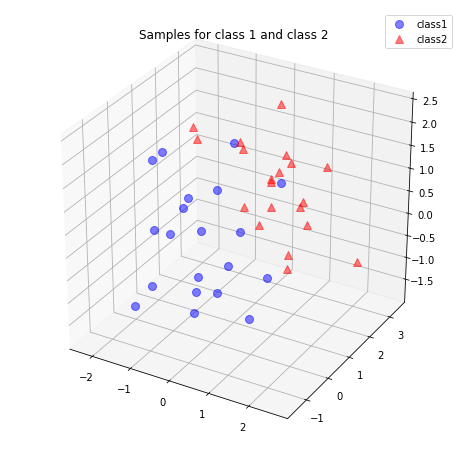

In [6]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

#### Stack samples

In [7]:
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
assert all_samples.shape == (3,40), "The matrix has not the dimensions 3x40"

In [8]:
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

print('Mean Vector:\n', mean_vector)

Mean Vector:
 [[0.1442221 ]
 [0.92373383]
 [0.49784353]]


#### Scatter matrix - unnormalized covariance matrix

In [13]:
scatter_matrix = np.zeros((3,3))
for i in range(all_samples.shape[1]):
    scatter_matrix += (all_samples[:,i].reshape(3,1) - mean_vector).dot((all_samples[:,i].reshape(3,1) - mean_vector).T)

print('Scatter Matrix:\n', scatter_matrix/ (all_samples.shape[1]-1))

Scatter Matrix:
 [[1.48337587 0.02365131 0.25282222]
 [0.02365131 1.23108608 0.19685724]
 [0.25282222 0.19685724 1.23419235]]


#### Covariance matrix

In [14]:
cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[1.48337587 0.02365131 0.25282222]
 [0.02365131 1.23108608 0.19685724]
 [0.25282222 0.19685724 1.23419235]]


### Get Eigen values and vectors

In [17]:
# eigenvectors and eigenvalues for the from the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

In [18]:

for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
    assert eigvec_sc.all() == eigvec_cov.all(), 'Eigenvectors are not identical'

    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print('Scaling factor: ', eig_val_sc[i]/eig_val_cov[i])
    print(40 * '-')

Eigenvector 1: 
[[-0.77061684]
 [-0.29040024]
 [-0.56728951]]
Eigenvalue 1 from scatter matrix: 65.45774508405451
Eigenvalue 1 from covariance matrix: 1.6784037201039603
Scaling factor:  39.000000000000036
----------------------------------------
Eigenvector 2: 
[[-0.5318186 ]
 [ 0.78352377]
 [ 0.32134013]]
Eigenvalue 2 from scatter matrix: 50.53495687791698
Eigenvalue 2 from covariance matrix: 1.2957681250747928
Scaling factor:  39.00000000000005
----------------------------------------
Eigenvector 3: 
[[-0.35116757]
 [-0.54932523]
 [ 0.75823686]]
Eigenvalue 3 from scatter matrix: 38.00481555656482
Eigenvalue 3 from covariance matrix: 0.9744824501683285
Scaling factor:  39.000000000000014
----------------------------------------


### Covariance Matrix * eigen vector = Eigen value * eigen vector
$\sum v$ = $\lambda v$

$\sum$=Covariancematrix   
$v$=Eigenvector   
$\lambda$=Eigenvalue

In [19]:
for i in range(len(eig_val_sc)):
    eigv = eig_vec_sc[:,i].reshape(1,3).T
    np.testing.assert_array_almost_equal(scatter_matrix.dot(eigv), eig_val_sc[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)


#### Check last sample

In [25]:
eig_val_sc[i] *eig_vec_sc[:,i].reshape(1,3).T, scatter_matrix.dot(eigv)

(array([[-13.34605866],
        [-20.87700393],
        [ 28.81665197]]), array([[-13.34605866],
        [-20.87700393],
        [ 28.81665197]]))

In [23]:
eig_vec_sc

array([[-0.77061684, -0.5318186 , -0.35116757],
       [-0.29040024,  0.78352377, -0.54932523],
       [-0.56728951,  0.32134013,  0.75823686]])

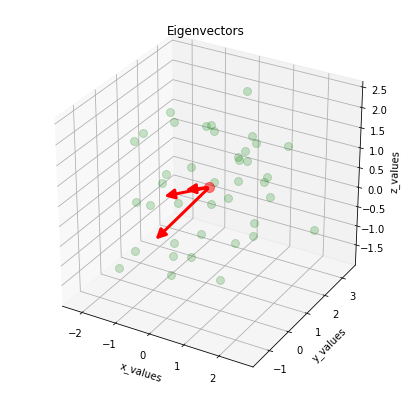

In [27]:
from matplotlib.patches import FancyArrowPatch

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_sc.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

#### test length of eigen vector

In [ ]:
for ev in eig_vec_sc:
    numpy.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))

In [28]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

65.45774508405451
50.53495687791698
38.00481555656482


#### Select 2 dimensions

In [29]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.77061684 -0.5318186 ]
 [-0.29040024  0.78352377]
 [-0.56728951  0.32134013]]


### Transform into subspace

$y$ = $W^T \dot x$

In [32]:
transformed = matrix_w.T.dot(all_samples)
assert transformed.shape == (2,40), "The matrix is not 2x40 dimensional."

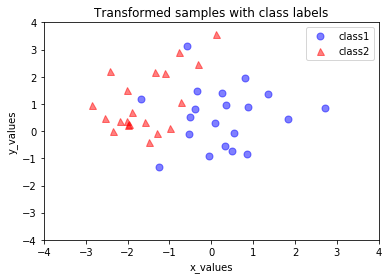

In [33]:
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

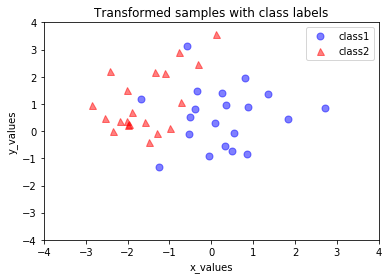

In [34]:
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()


https://sebastianraschka.com/resources.html